This is going to be an Exploratory Data Analysis on a data set(https://data.nysed.gov/downloads.php) of the grduation rate of highschoolers in NYC from the 2023-2024 school year. In this Analysis Report, I will explore the differrnt relationships between school types. 

Observations: 
There are way more boys being enrolled in schools than girls so it looks like boys, graduate, dropout, etc more than girls when in reality, the # of boys is just larger. 

There are 18971.0 more boys than girls.



In [121]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

grad_rates=pd.read_csv("HS_Grad_Rates_23-24.csv")
main_frame=grad_rates[grad_rates['aggregation_type'].isin(["County"])]

print(main_frame.isna().sum())
cols_to_drop=main_frame.columns[main_frame.isna().sum() > 0]
main_frame.drop(columns=cols_to_drop, inplace=True)
print("-------------------------")
print(main_frame.isna().sum())

print(main_frame.head())



report_school_year               0
aggregation_index                0
aggregation_type                 0
INSTITUTION_ID                8184
aggregation_code                 0
aggregation_name                 0
lea_beds                      8184
lea_name                      8184
nrc_code                      8184
nrc_desc                      8184
county_code                      0
county_name                      0
nyc_ind                          0
boces_code                    8184
boces_name                    8184
membership_code                  0
membership_desc                  0
subgroup_code                    0
subgroup_name                    0
enroll_cnt                       0
grad_cnt                         0
grad_pct                         0
local_cnt                        0
local_pct                        0
reg_cnt                          0
reg_pct                          0
reg_adv_cnt                      0
reg_adv_pct                      0
non_diploma_credenti

C:\Users\fdram\AppData\Local\Temp\ipykernel_15008\861305385.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  grad_rates=pd.read_csv("HS_Grad_Rates_23-24.csv")
C:\Users\fdram\AppData\Local\Temp\ipykernel_15008\861305385.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_frame.drop(columns=cols_to_drop, inplace=True)


In [122]:
main_frame.set_index("subgroup_name", inplace=True)
main_frame=main_frame.replace("-", np.nan)
main_frame=main_frame.astype({
    "enroll_cnt": "float",
    "grad_cnt": "float",
    "local_cnt": "float",
    "reg_cnt": "float",
    "reg_adv_cnt": "float",
    "non_diploma_credential_cnt": "float",
    "still_enr_cnt": "float",
    "ged_cnt": "float",
    "dropout_cnt": "float"
})
colNames=["membership_code", "membership_desc", "county_code", "county_name", "enroll_cnt", "grad_cnt", "local_cnt", "reg_cnt", "reg_adv_cnt", "non_diploma_credential_cnt", "still_enr_cnt", "ged_cnt", "dropout_cnt"]

all_by_county=main_frame.loc["All Students", colNames]
gender_df=main_frame.loc[["Female", "Male"], colNames]

gender_df=gender_df[gender_df["membership_desc"].str.contains("2018 Total Cohort - 6 Year Outcome - August 2024|2019 Total Cohort - 5 Year Outcome - August 2024|2020 Total Cohort - 4 Year Outcome - August 2024")]
all_by_county=all_by_county[all_by_county["membership_desc"].str.contains("2018 Total Cohort - 6 Year Outcome - August 2024|2019 Total Cohort - 5 Year Outcome - August 2024|2020 Total Cohort - 4 Year Outcome - August 2024")]

numeric_colNames=["enroll_cnt", "grad_cnt", "local_cnt", "reg_cnt", "reg_adv_cnt", "non_diploma_credential_cnt", "still_enr_cnt", "ged_cnt", "dropout_cnt"]

all_by_county=all_by_county.groupby("county_name")[numeric_colNames].sum()
gender_df=gender_df.groupby(["county_name", 'subgroup_name'])[numeric_colNames].sum()

gender_df=gender_df.reset_index()

total_per_gender=gender_df.groupby("subgroup_name")["enroll_cnt"].sum()

print(total_per_gender)
difference=total_per_gender["Male"]-total_per_gender["Female"]

print("There are ", difference, "more boys than girls")
print(all_by_county.head())
print("-------------")
print(gender_df.head(20))


subgroup_name
Female    290381.0
Male      309352.0
Name: enroll_cnt, dtype: float64
There are  18971.0 more boys than girls
             enroll_cnt  grad_cnt  local_cnt  reg_cnt  reg_adv_cnt  non_diploma_credential_cnt  still_enr_cnt  ged_cnt  dropout_cnt
county_name                                                                                                                        
ALBANY           9000.0    7988.0       73.0   3888.0       4027.0                        66.0          377.0     10.0        555.0
ALLEGANY         1442.0    1305.0       29.0    835.0        441.0                        22.0           29.0      1.0         85.0
BRONX           42174.0   34725.0      815.0  26763.0       7147.0                       419.0         2863.0    324.0       3791.0
BROOME           5985.0    5074.0      115.0   2719.0       2240.0                        71.0          201.0     97.0        536.0
CATTARAUGUS      2883.0    2538.0       18.0   1616.0        904.0                 

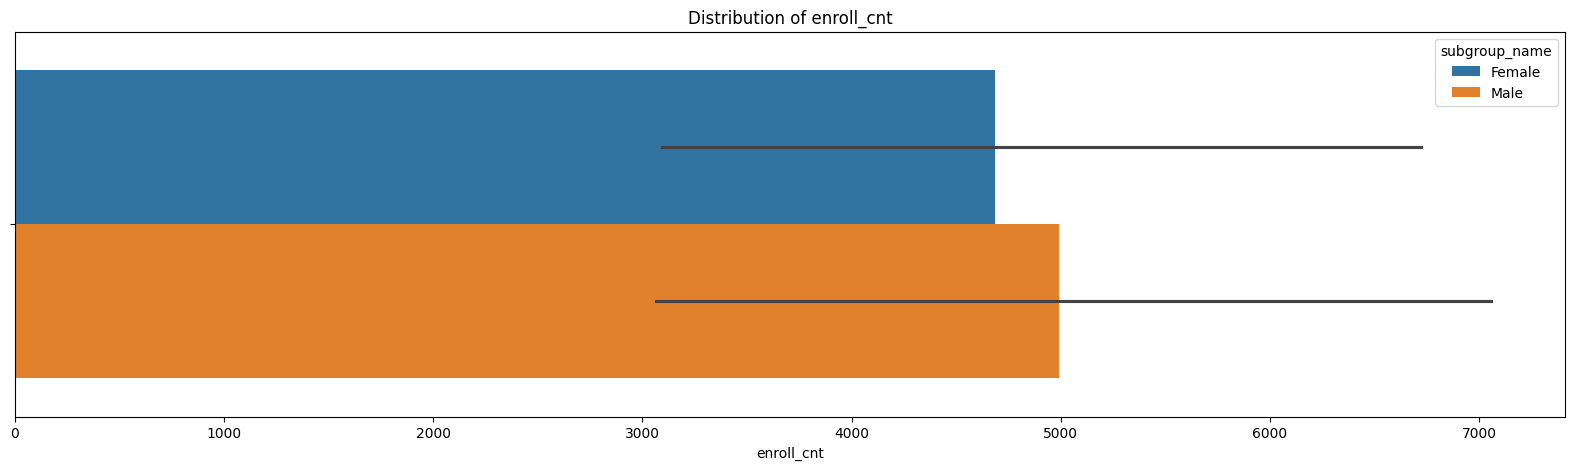

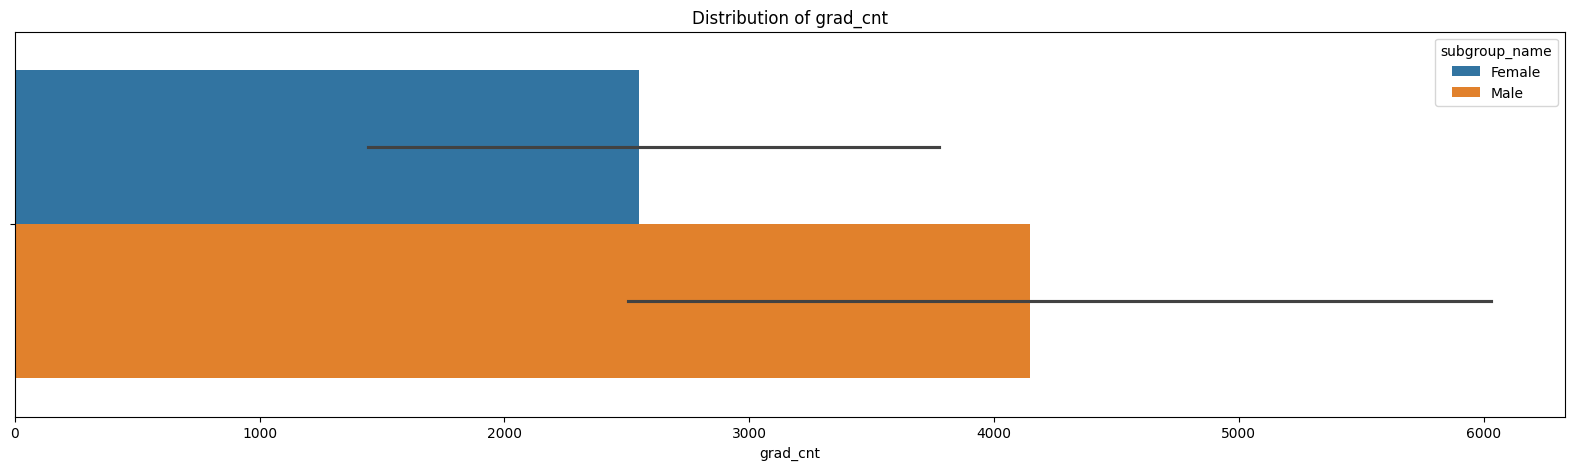

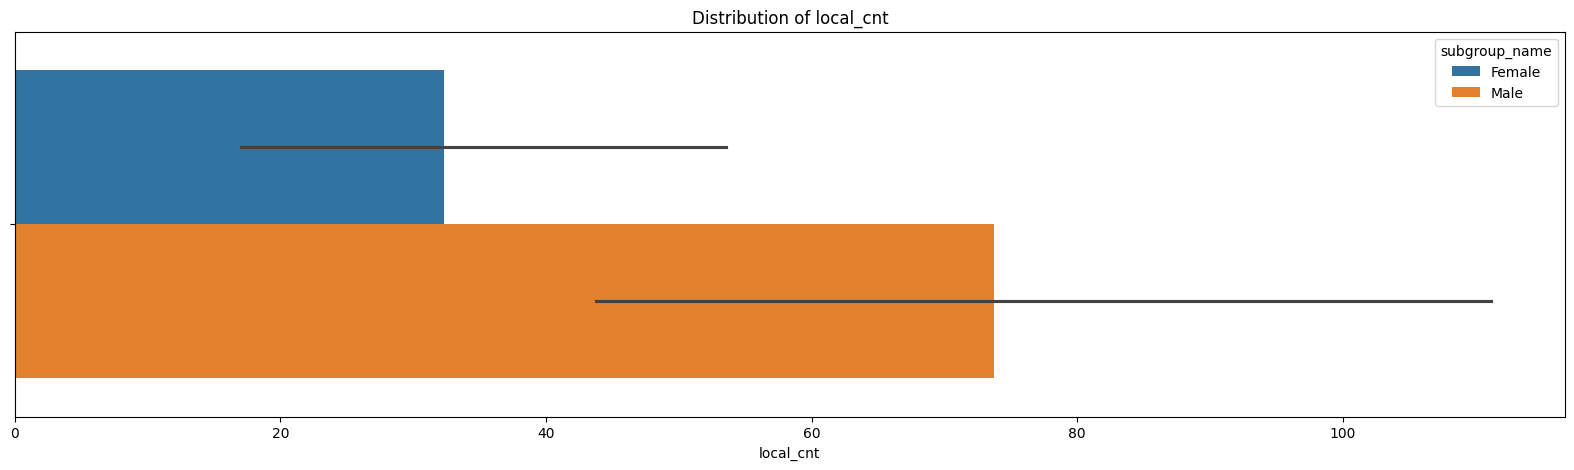

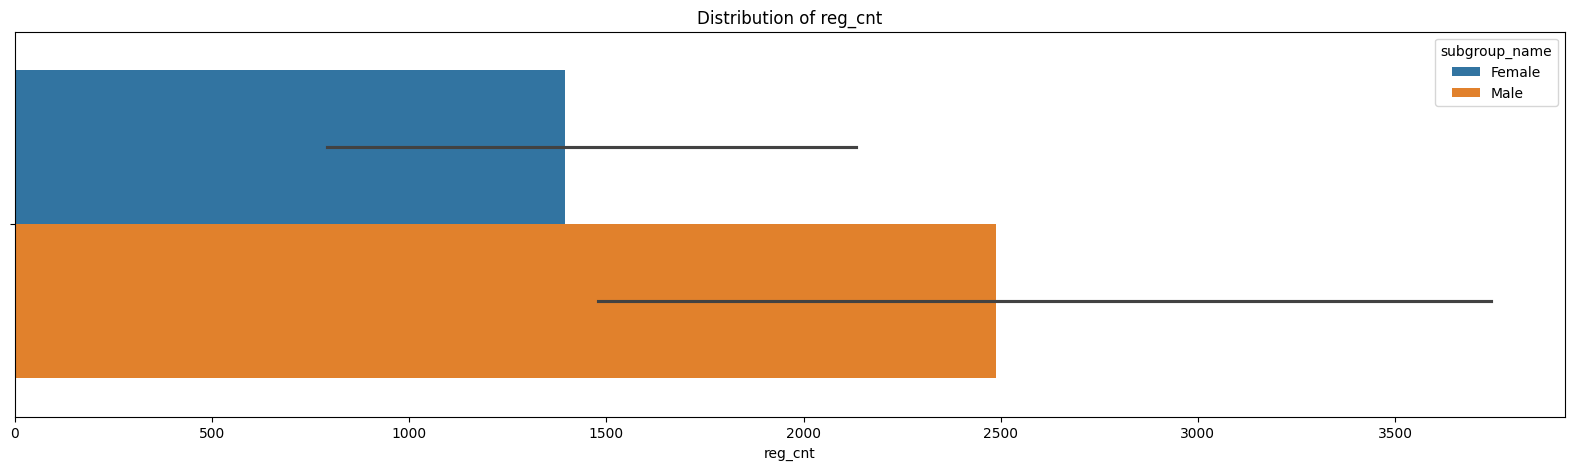

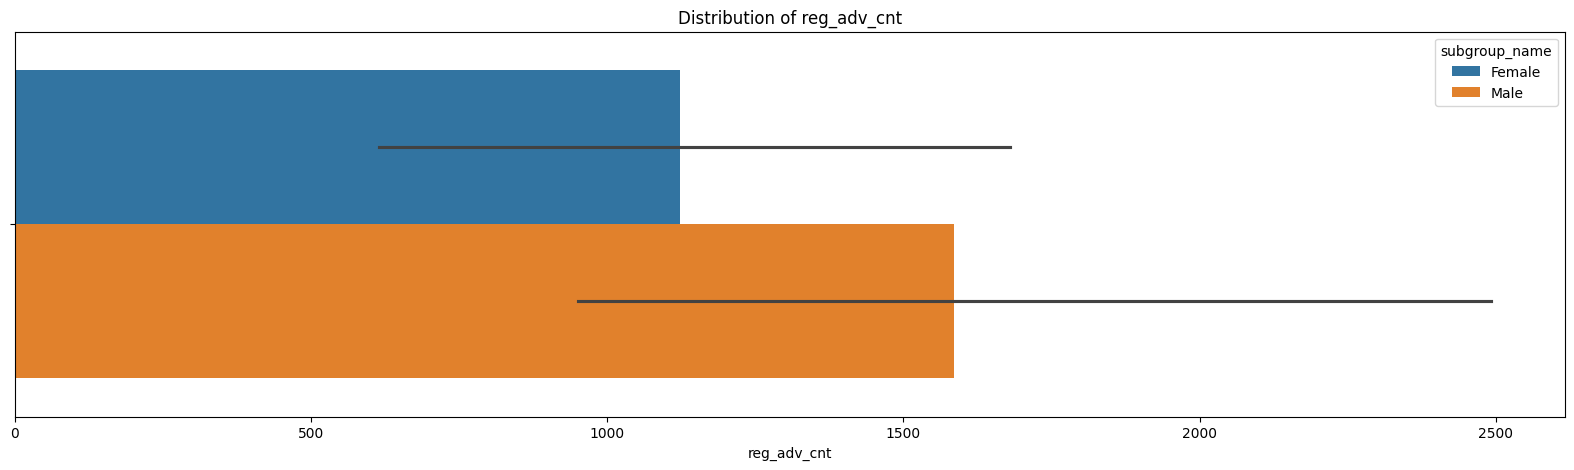

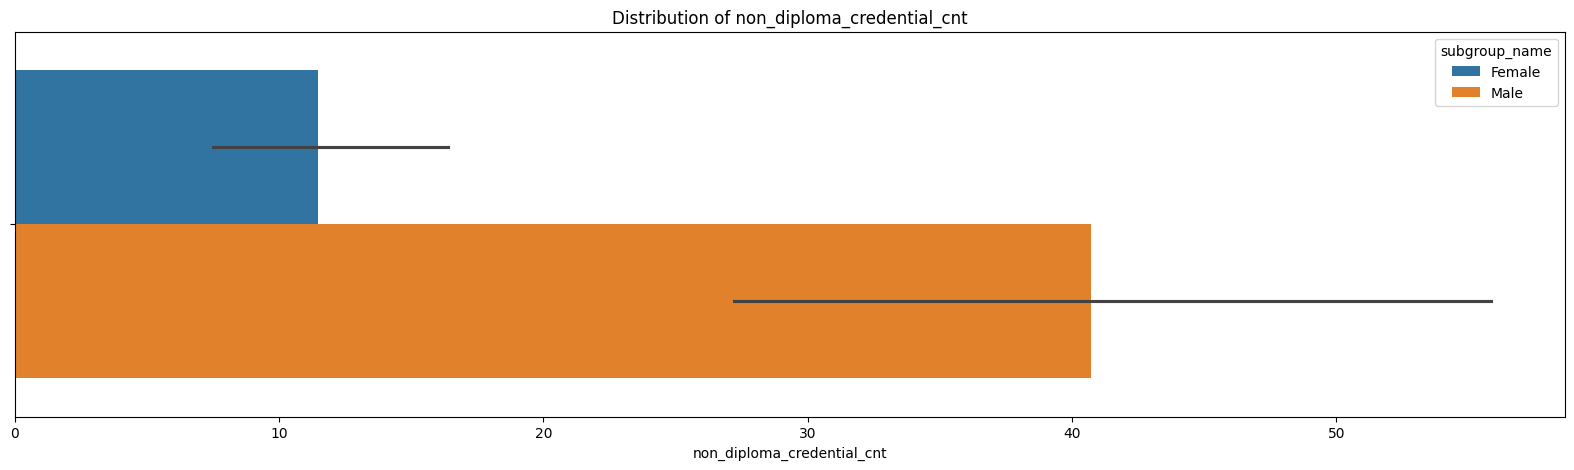

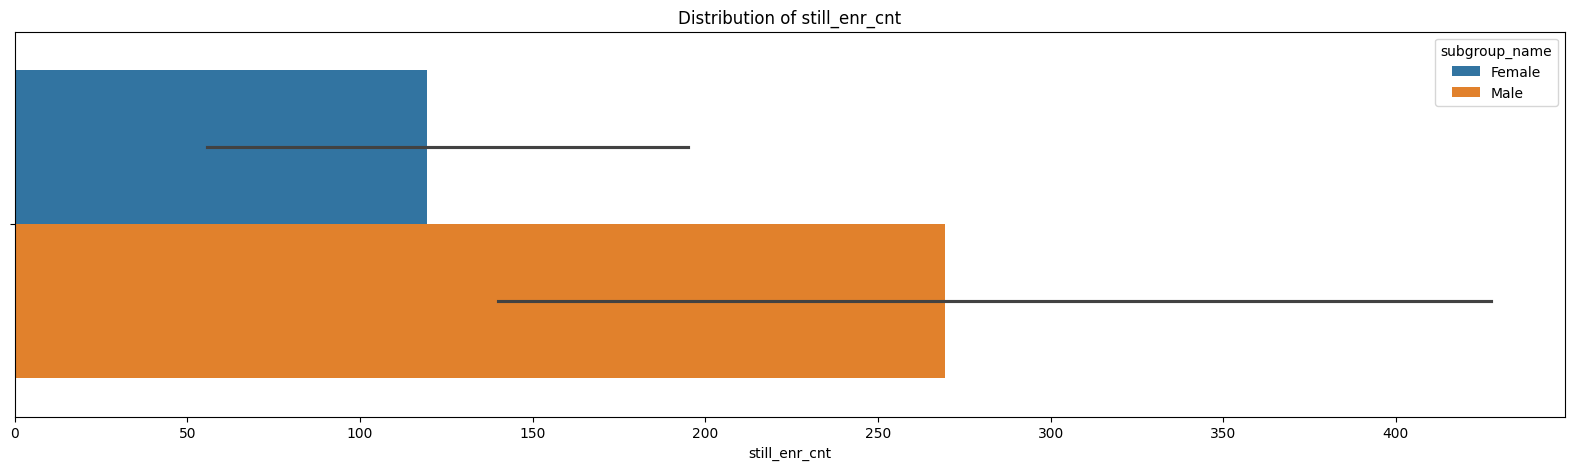

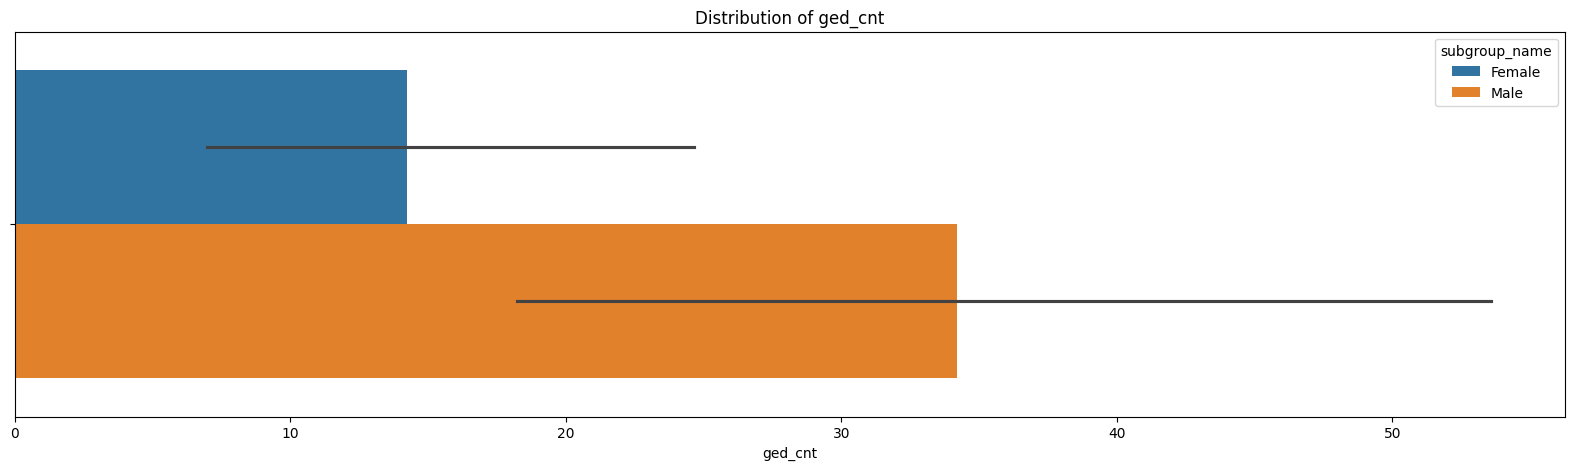

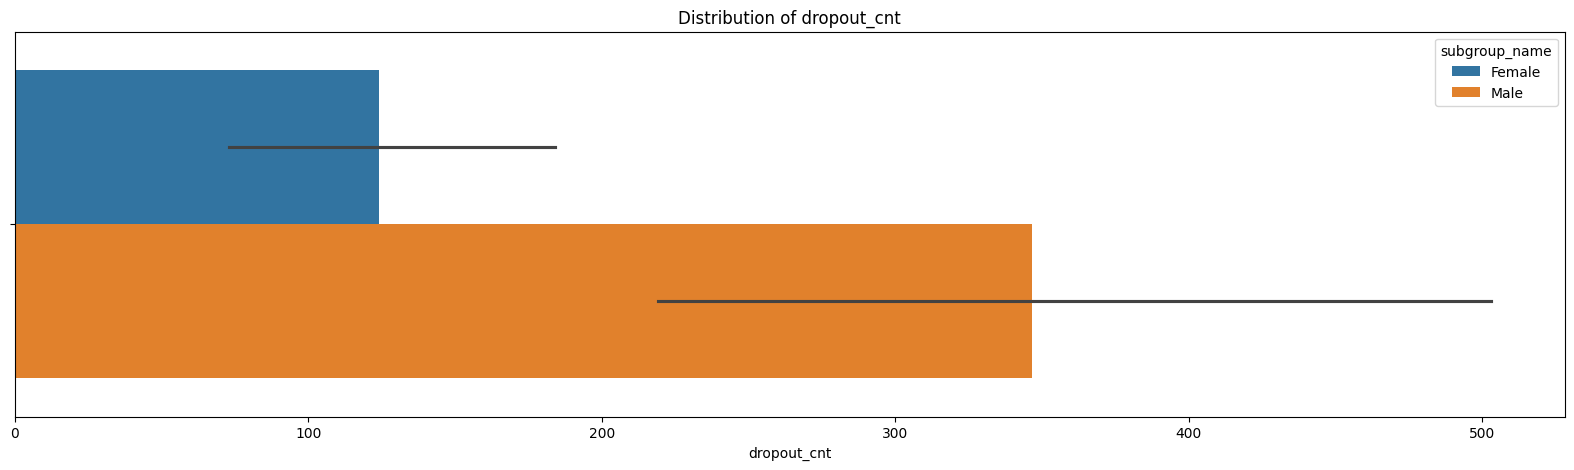

   county_name subgroup_name  enroll_cnt  grad_cnt  local_cnt  reg_cnt  reg_adv_cnt  non_diploma_credential_cnt  still_enr_cnt  ged_cnt  dropout_cnt
0       ALBANY        Female      4441.0    1403.0        9.0    653.0        741.0                        10.0           32.0      1.0         84.0
1       ALBANY          Male      4553.0    2623.0       32.0   1352.0       1239.0                        33.0          167.0      4.0        212.0
2     ALLEGANY        Female       658.0     612.0       12.0    356.0        244.0                         7.0           13.0      0.0         26.0
3     ALLEGANY          Male       782.0     482.0        8.0    337.0        137.0                        12.0            9.0      1.0         43.0
4        BRONX        Female     19890.0    5506.0      207.0   4358.0        941.0                        13.0          664.0     39.0        388.0
5        BRONX          Male     22273.0   17556.0      532.0  13753.0       3271.0                       

In [126]:
for col in numeric_colNames:
    plt.figure(figsize=(20,5))
    sns.barplot(data=gender_df, x=col, hue='subgroup_name')
    plt.title(f'Distribution of {col}')
    plt.show()
print(gender_df.head(10))



Histogram/Pairwise plots
Because the data set has so many different categories, I'll focus on each County. Schools will be too much and Districts may not include all New York Schools and  I'll sum up the counts and do the histograms based on that. That way I'll get all students that graduated that year. The varibales are: 
    1. enroll_cnt
    2. gard_cny
    3. local_cnt
    4. reg_cnt
    5. reg_adv_cnt
    6. non_diploma_credential_cnt
    7. still_enr_cnt
    8. ged_cnt
    9. dropout_cnt
    So we'll be left with 9 variables

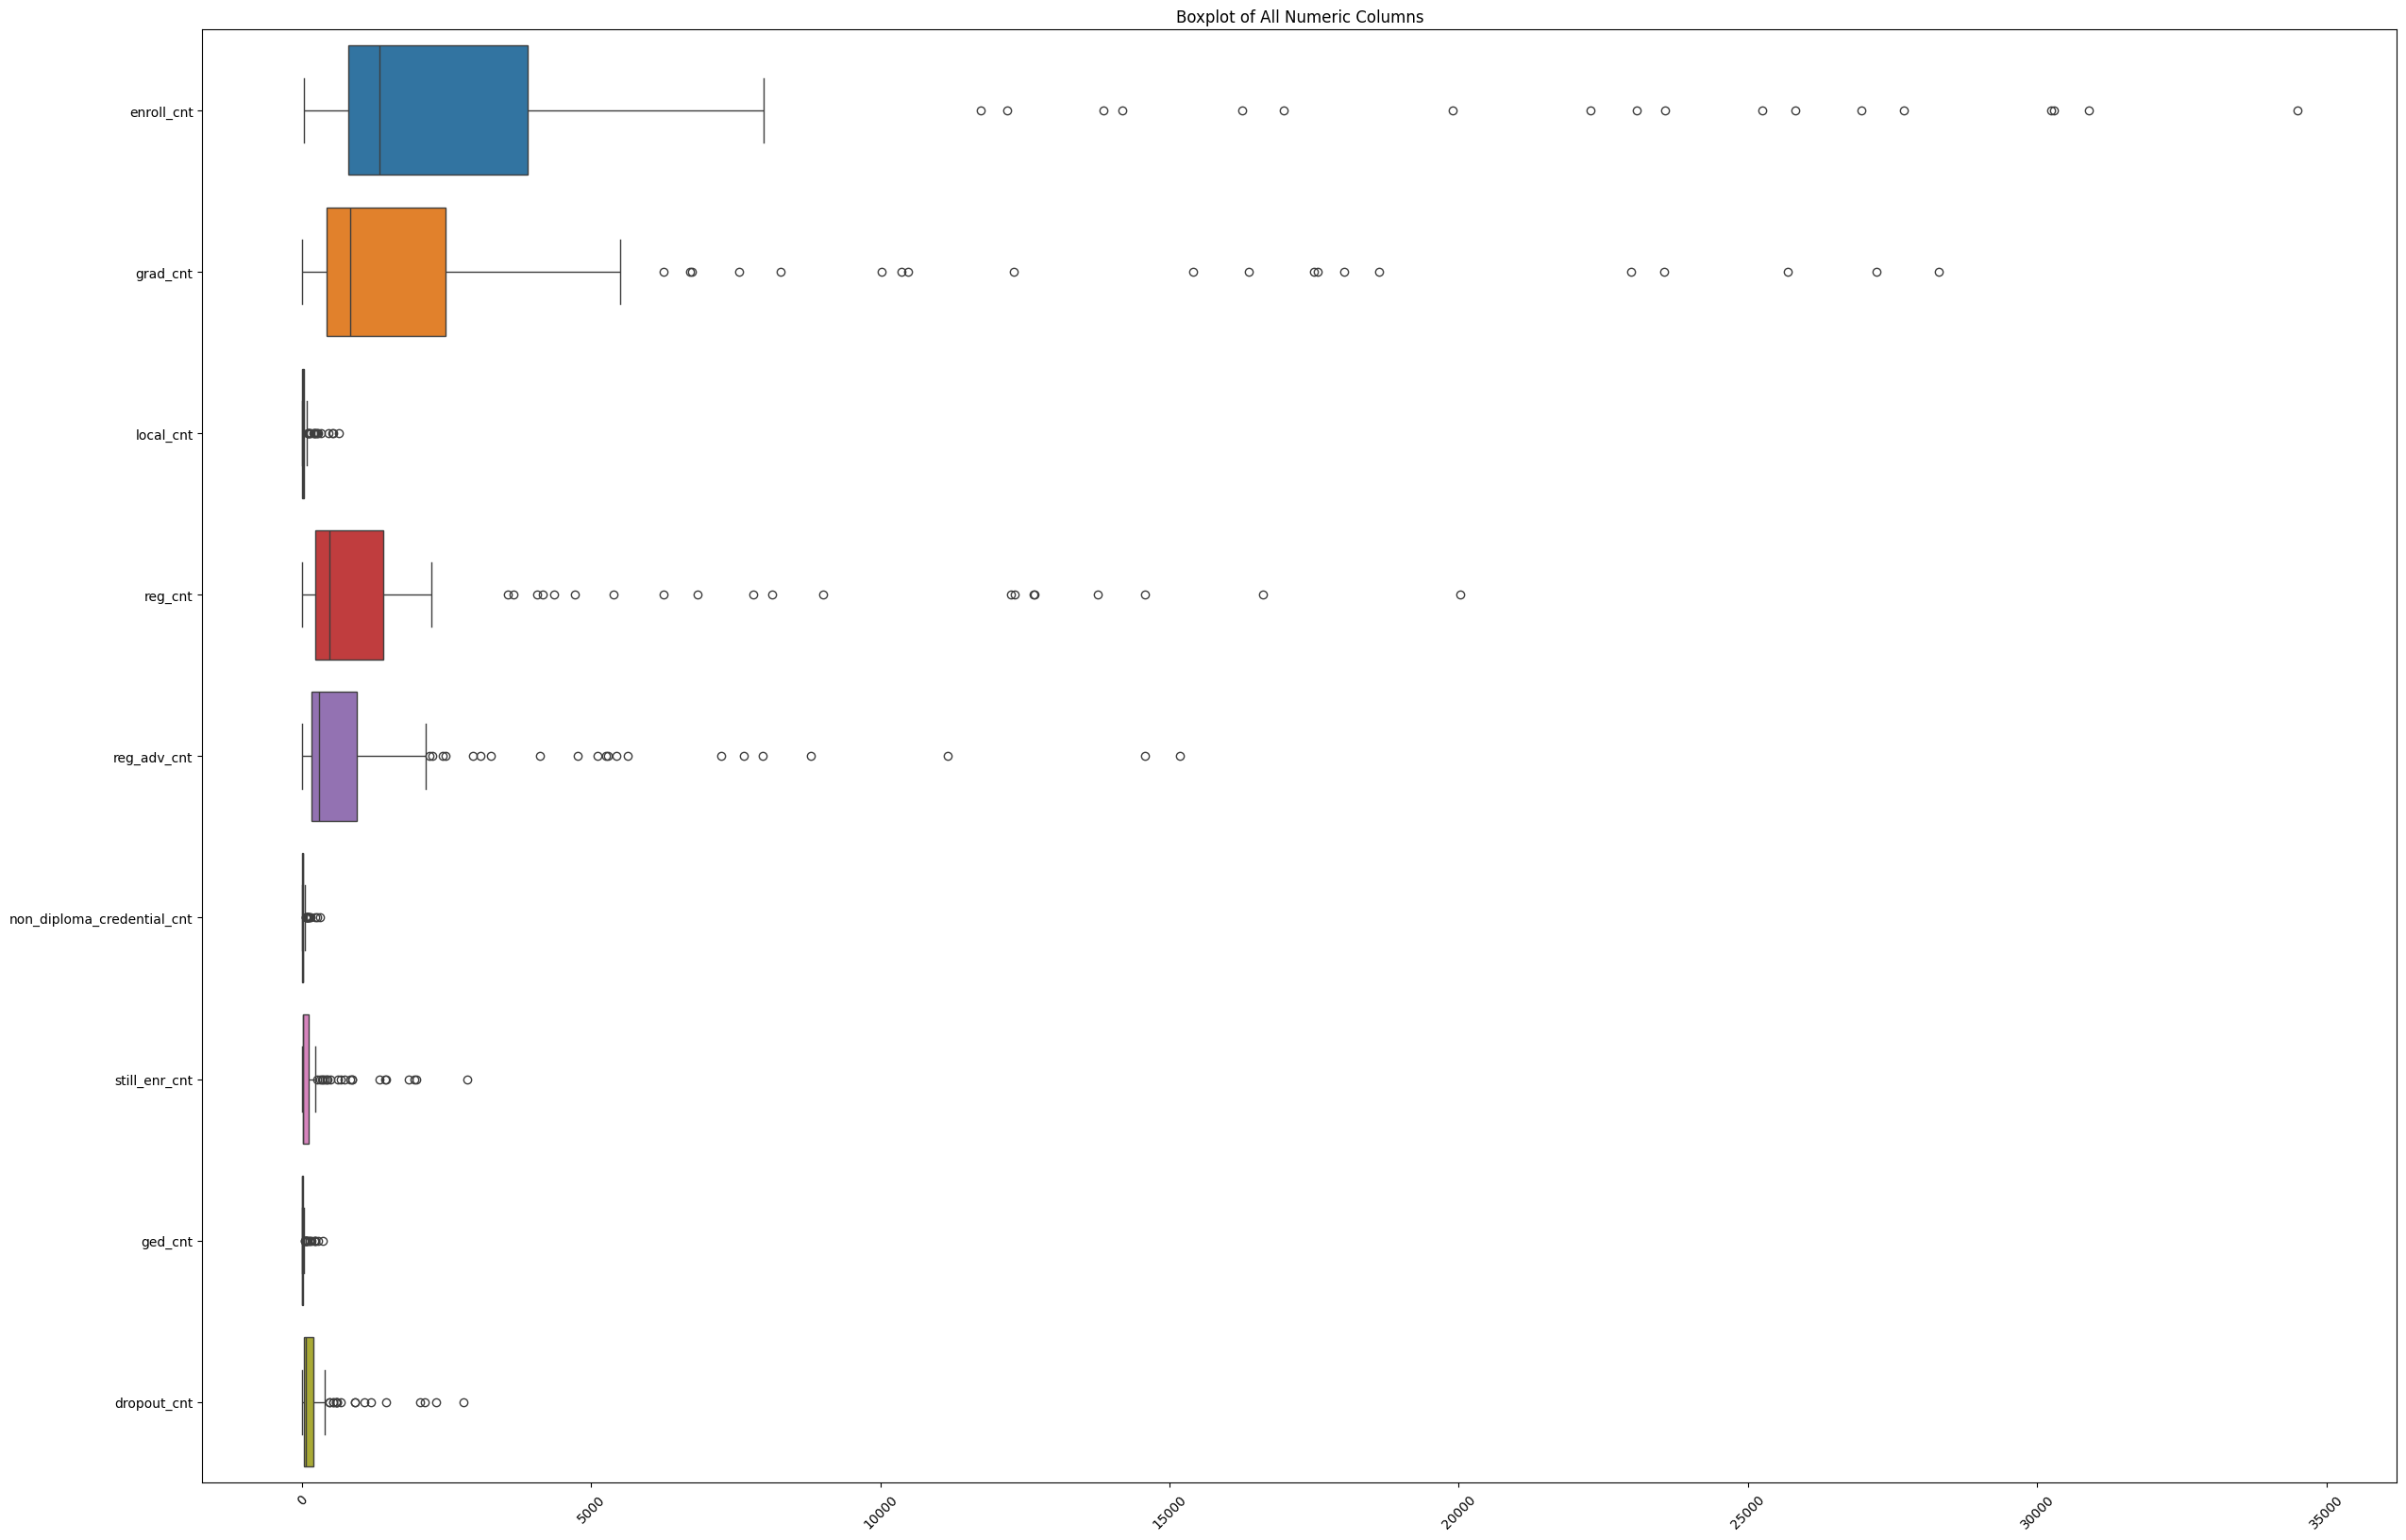

In [ ]:
plt.figure(figsize=(30,20))  # width x height
sns.boxplot(data=gender_df[numeric_colNames], orient='h',)
plt.xticks(rotation=45)
plt.title("Boxplot of All Numeric Columns")
plt.show()

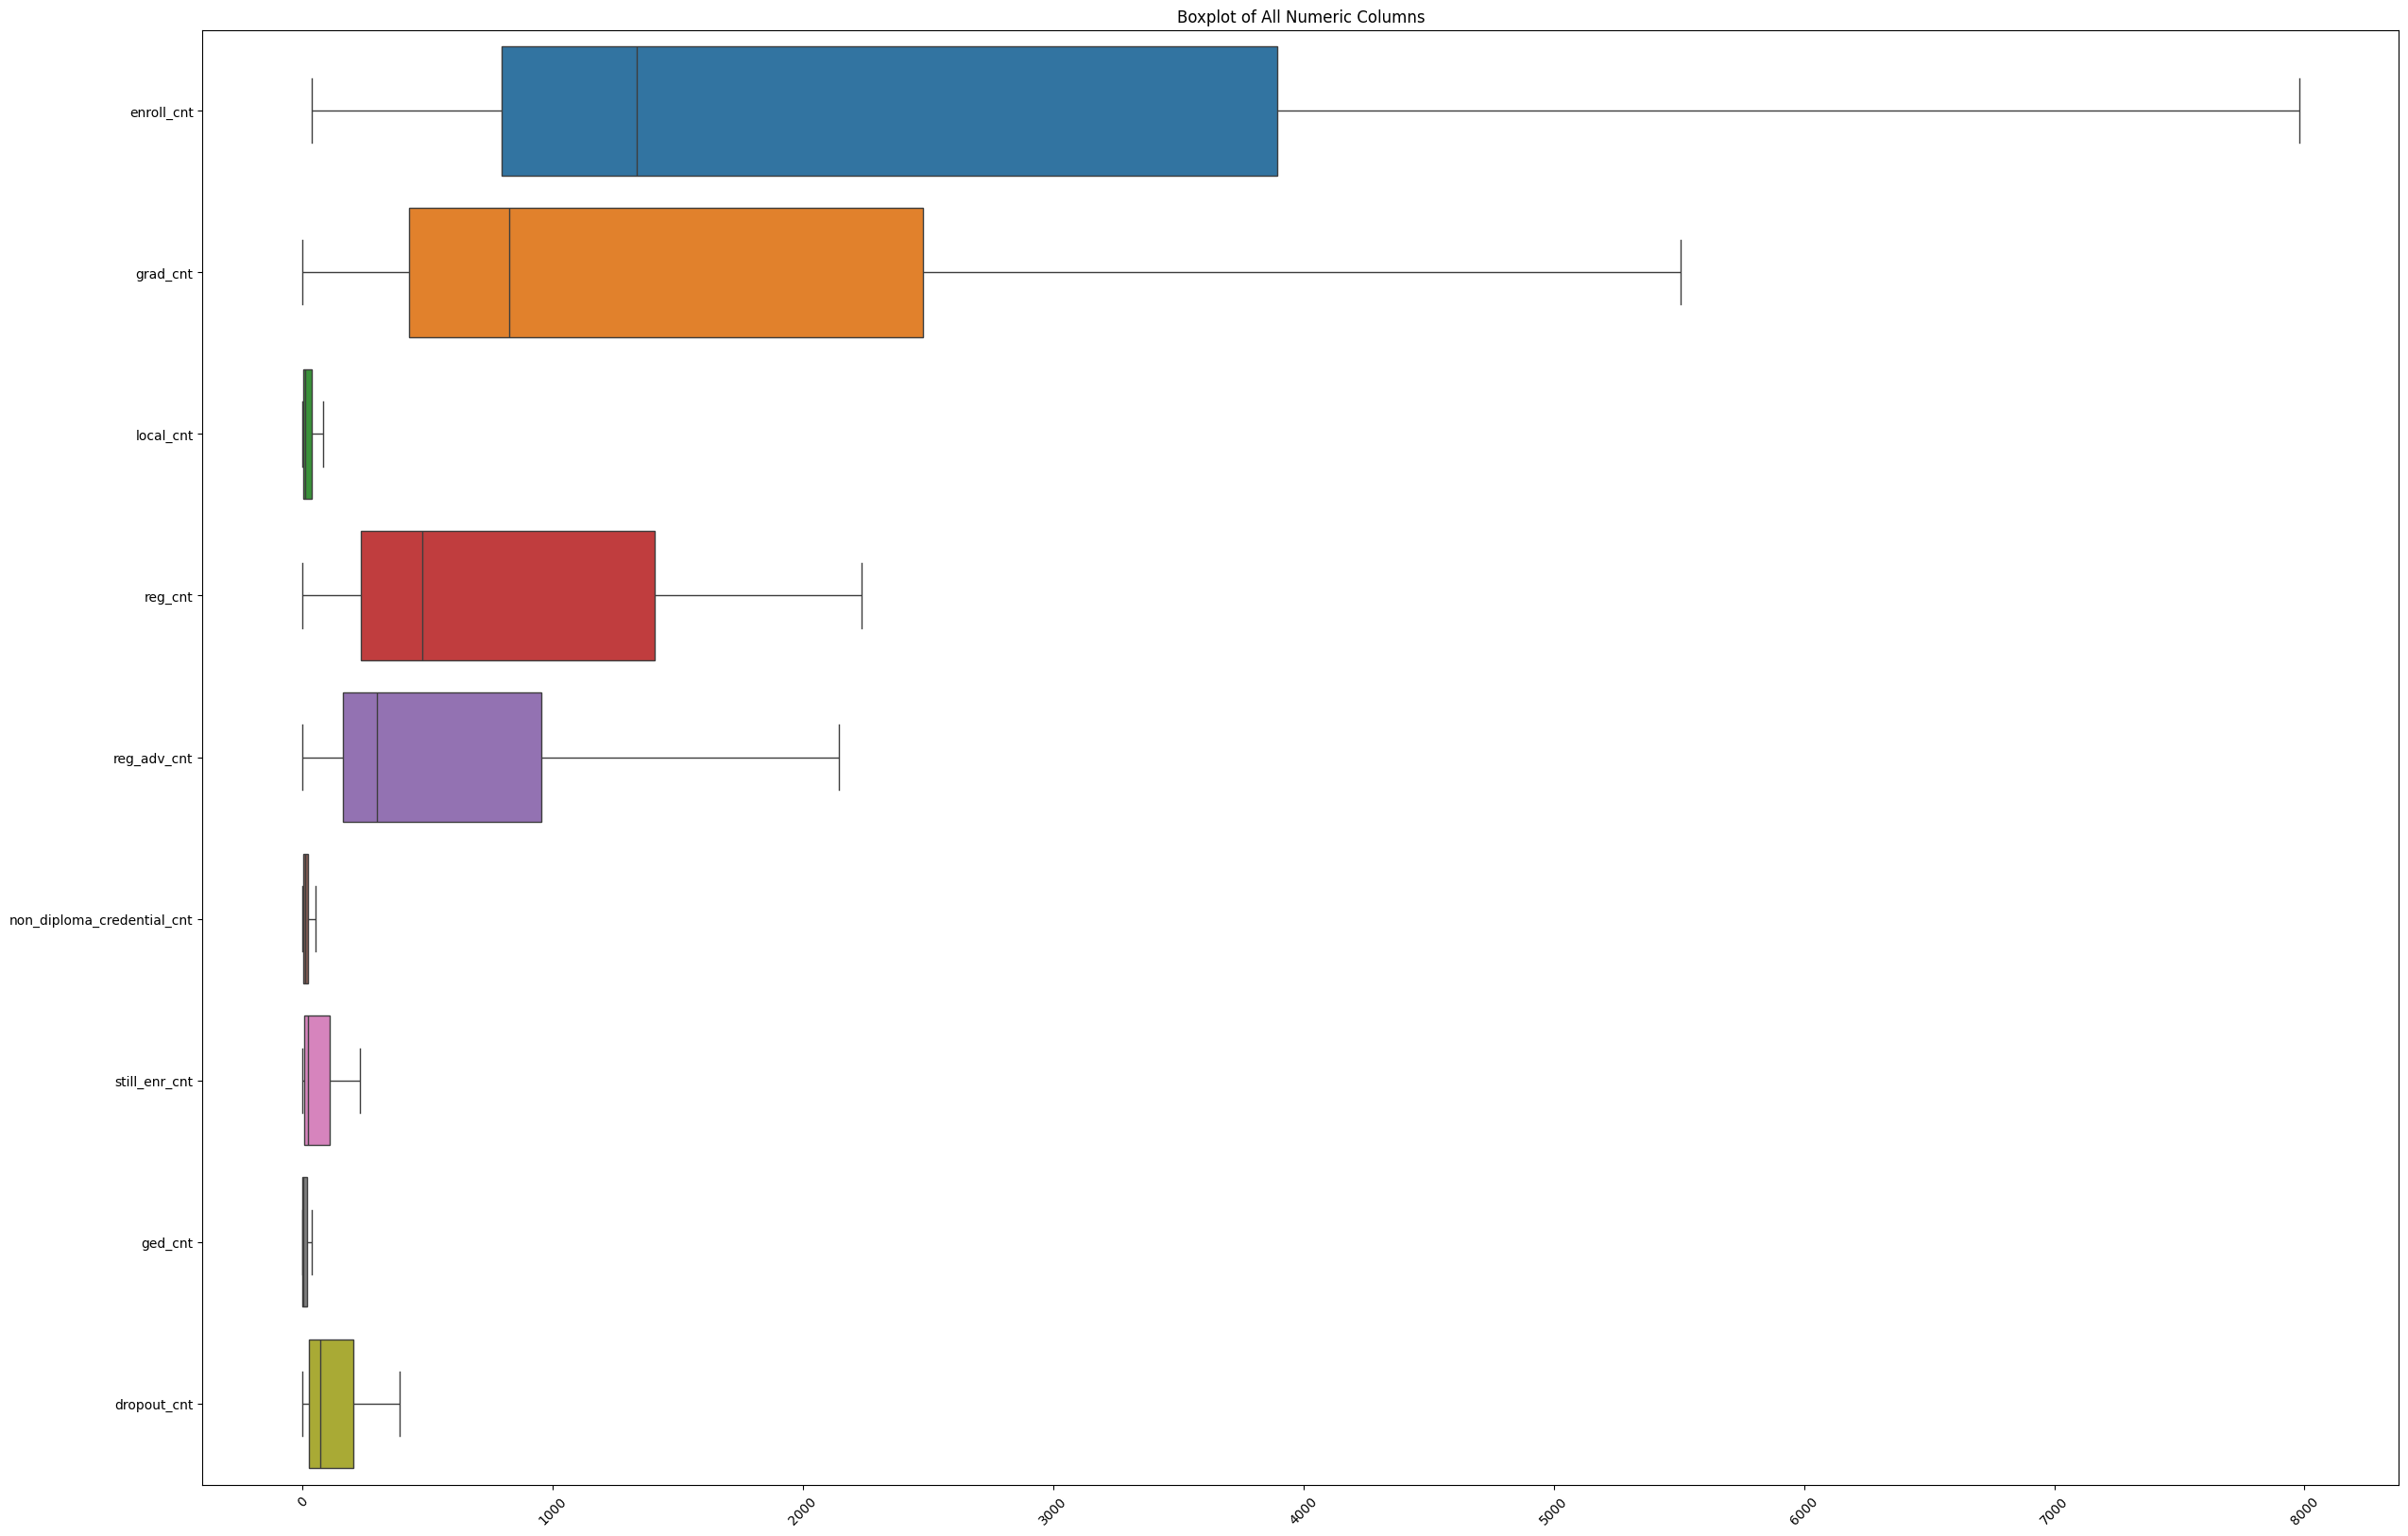

In [129]:
#Without outliers
plt.figure(figsize=(30,20))  # width x height
sns.boxplot(data=gender_df[numeric_colNames], showfliers=False, orient='h',)
plt.xticks(rotation=45)
plt.title("Boxplot of All Numeric Columns")
plt.show()

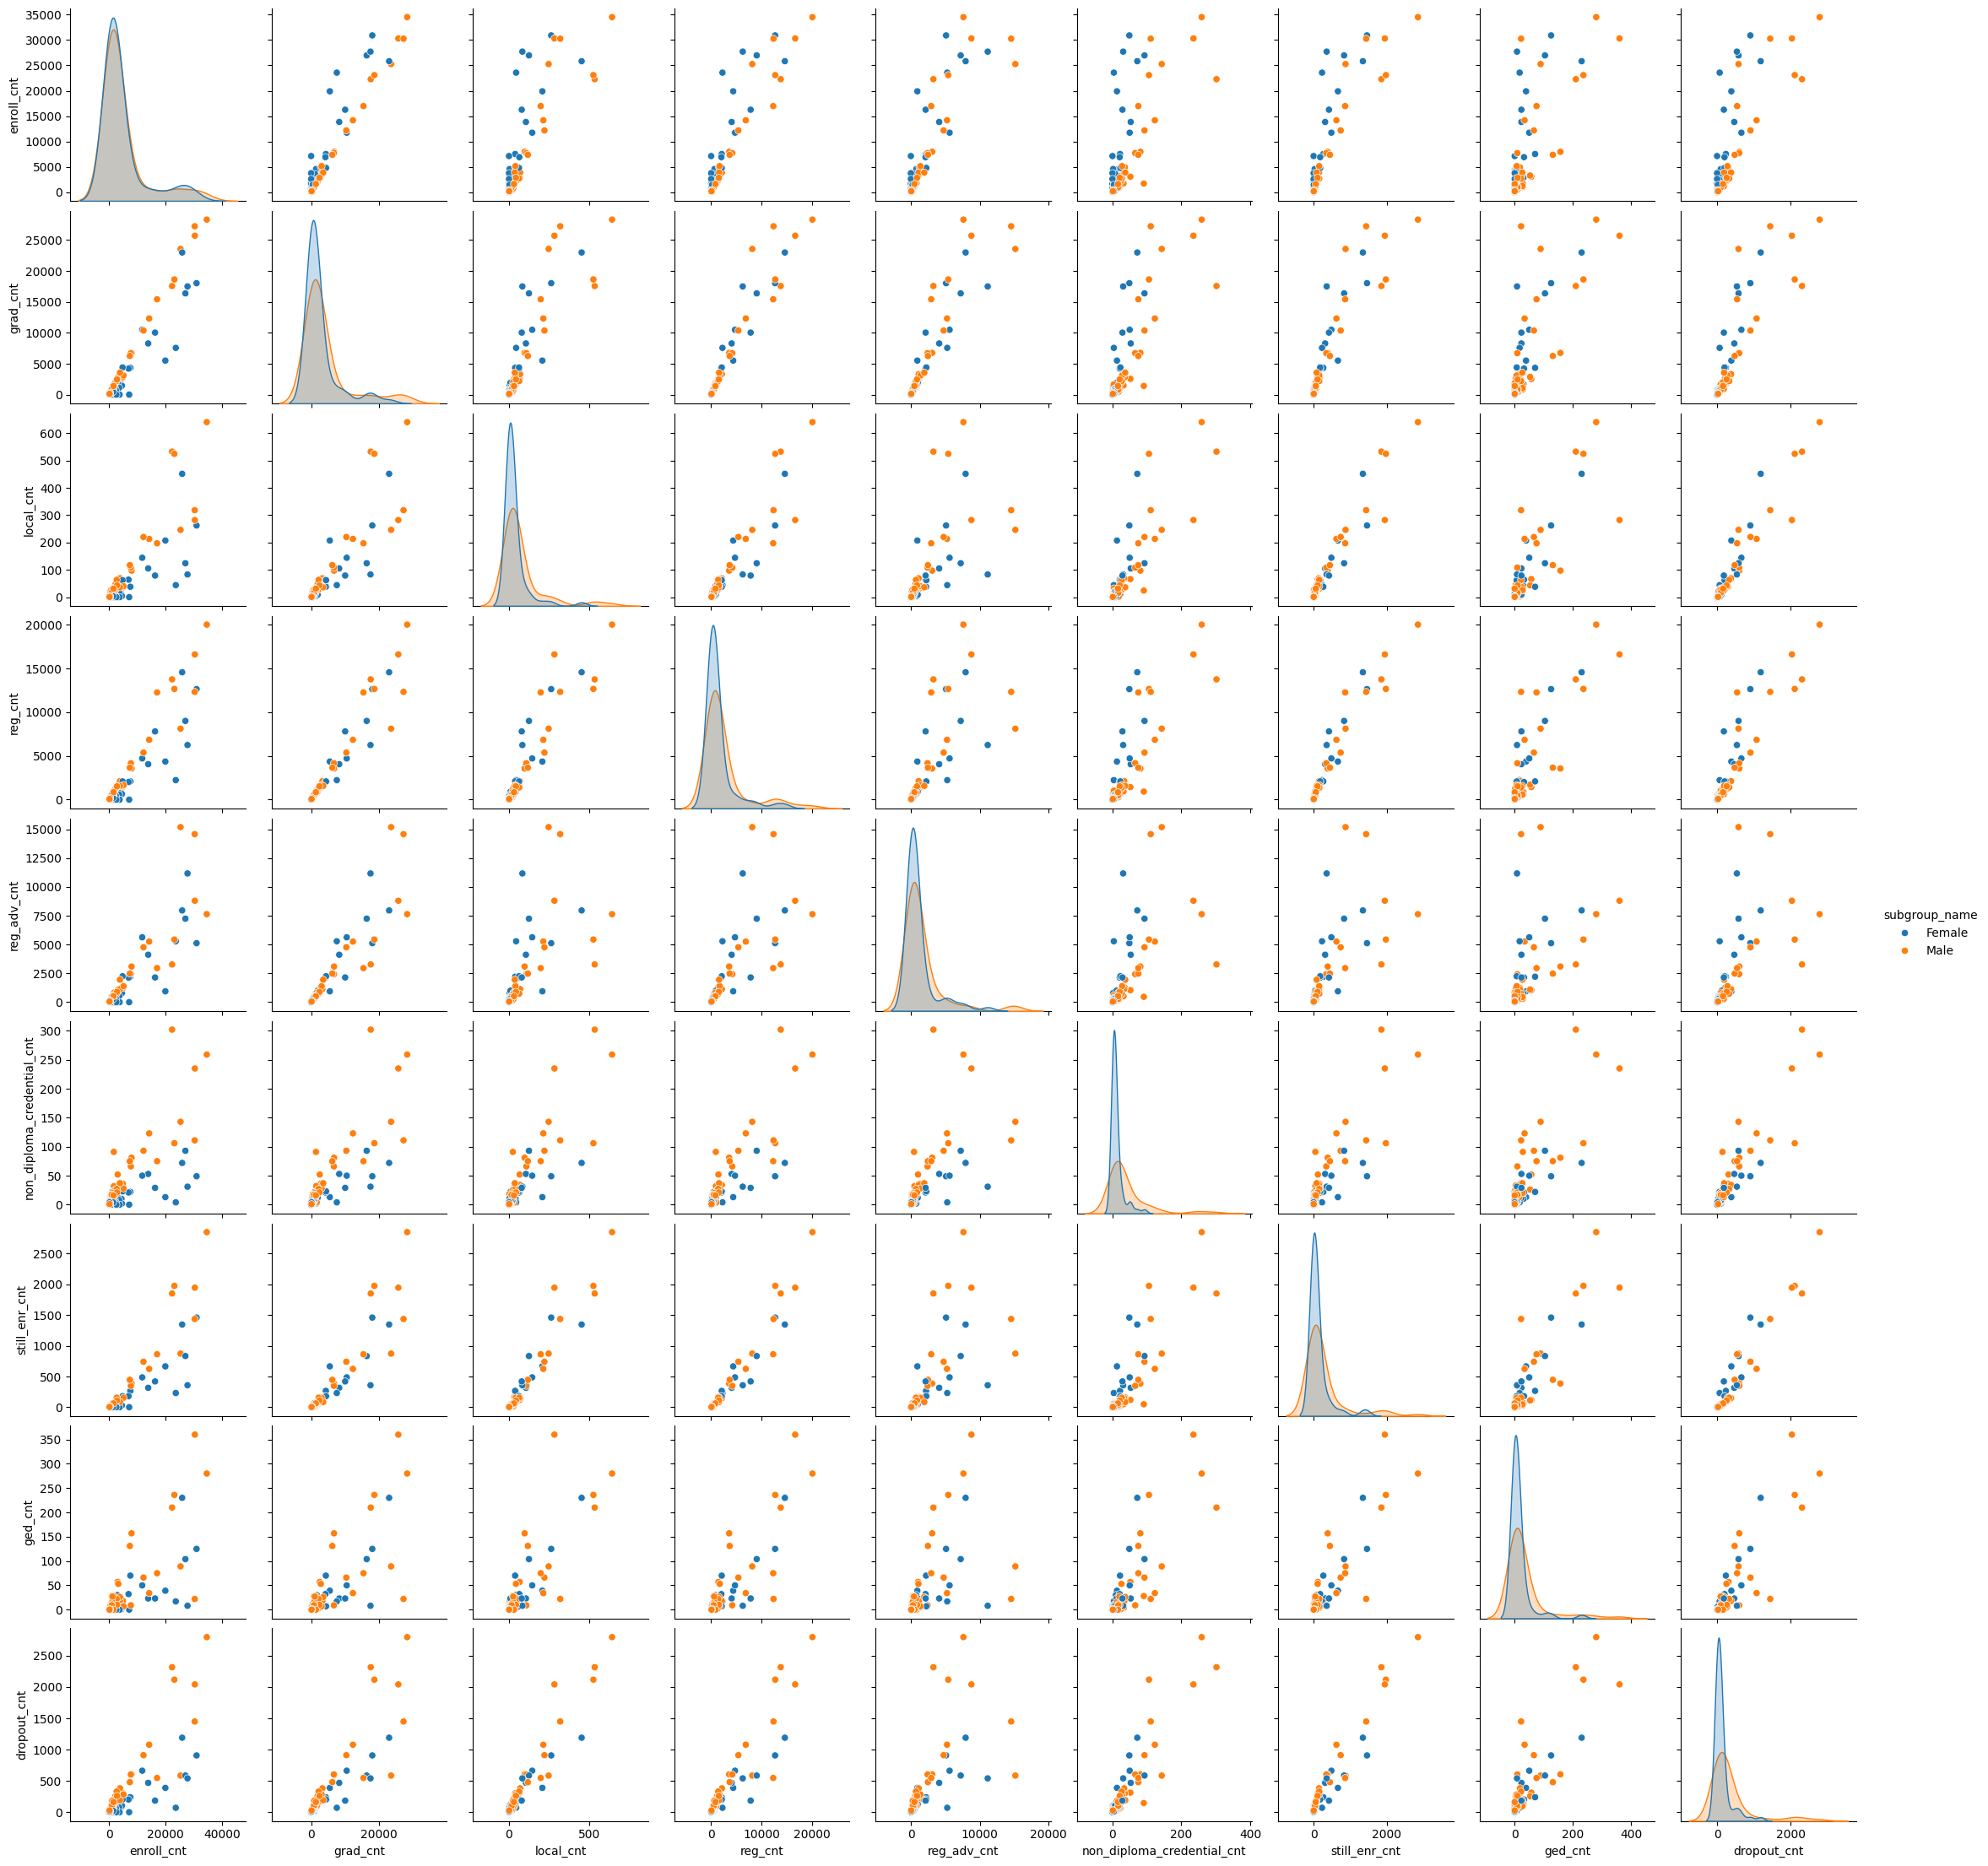

In [127]:
sns.pairplot(data=gender_df, vars=numeric_colNames, hue='subgroup_name')


Just noticed that the 2018 Total Cohort-6 Year Outcome = 2018 Total Cohoty - 6 Year Outcome - August 2024 and same for the other years so I'll get rid of the 6 8 9 membership_code rows. Maybe the data will be cut in half. But maybe I should keep it cause that would indicate how many students maybe were on the roll for graduation before and after summer school. 

In the future, I would want to explore these relationships:
1. District vs. graduation rate
2. County vs. graduation rate
3. gender vs. graduation rate
4. Race vs. enrollment rate per district 
5. Race vs. enrollment rate per county 
6. Summer school success per district
7. Summer school success rate per county
8. Regents diploma vs. district
9. Regents diploma vs. county
10. Year Outcome 4, 5, 6 vs. District
11. ELL vs. grad rate
12. disabled vs grad rate
13. economically disadvantaged
14. Homelessness
15. Did COVID have an effect on graduation rates or dropout rates
16. Did students who came in 2020 take longer to graduate?

 


